In [2]:
import pandas as pd
import os
from natural_pdf import PDF

[2025-07-21 23:50:43,857] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


In [1]:
pdf_folder = "pdfs"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages or len(pdf.pages) < 3:
        print("Not enough pages in this PDF.")
        continue

    page = pdf.pages[2]

    page.find("text").show()

NameError: name 'os' is not defined

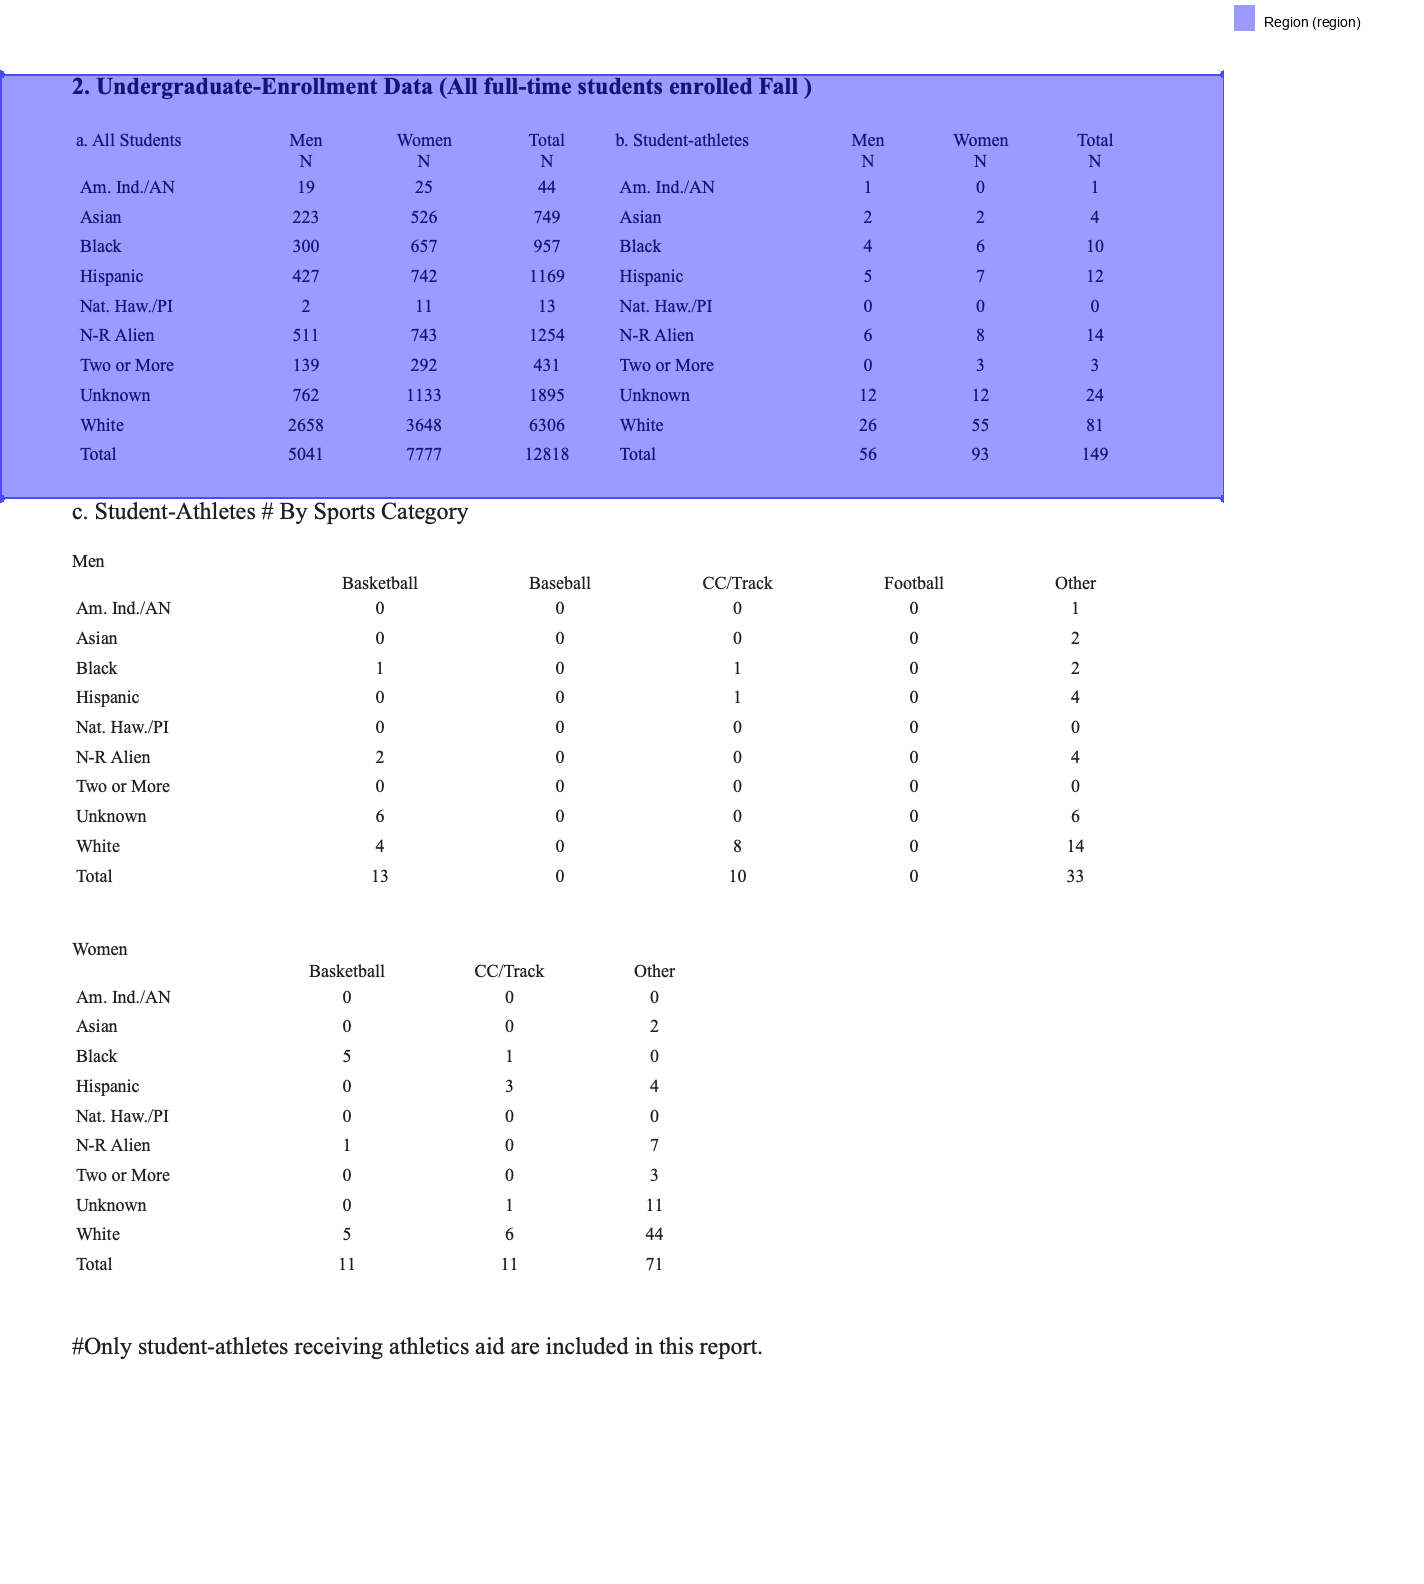

In [4]:
table = (
    page

    .find(text='Student-Athletes')
    .above(until='text:contains("Undergraduate-Enrollment Data")')
)
table.show()

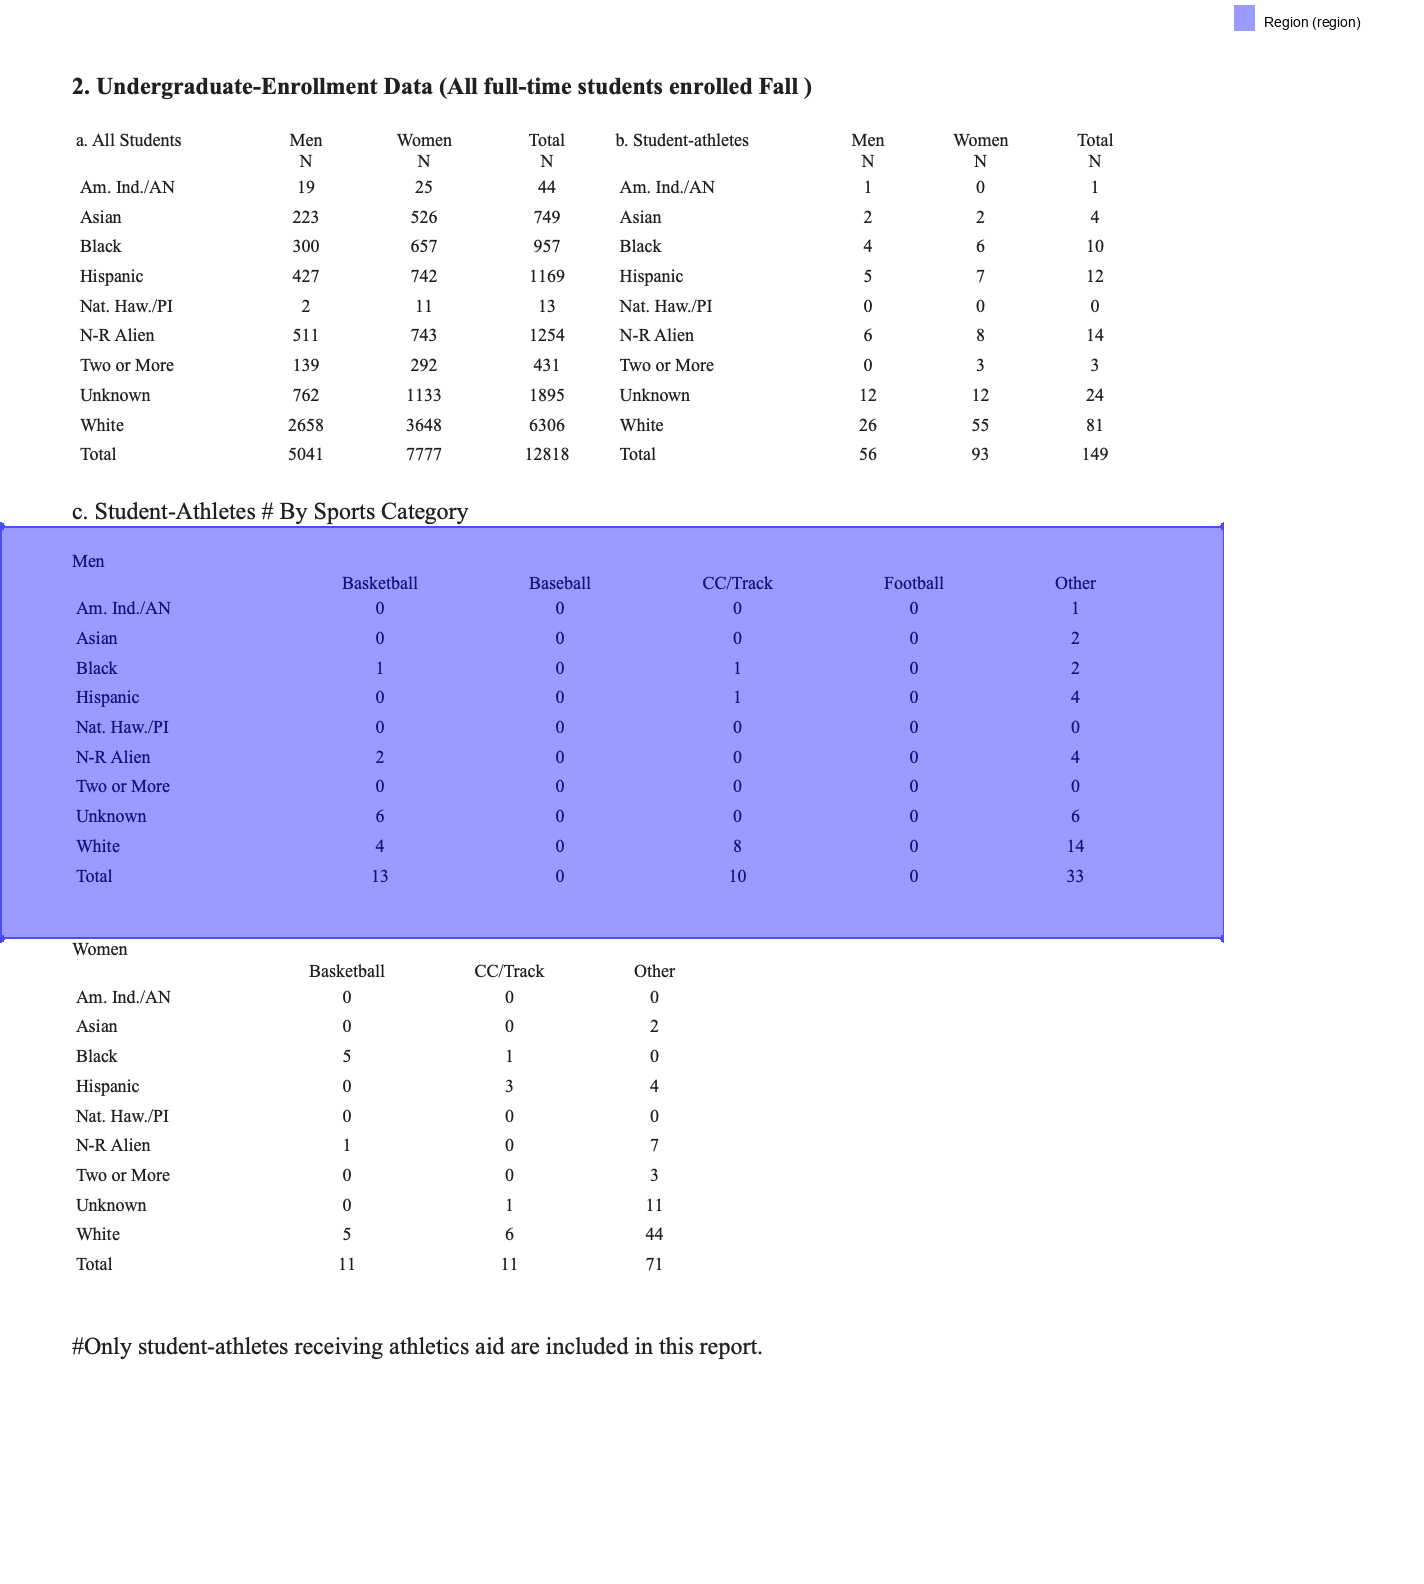

In [5]:
table = (
    page

    .find("text:contains(\"Student-Athletes #\")")
    .below(
        until="text:contains(\"Women\")",
        include_endpoint=False
    )

)
table.show()

In [27]:
clean_rows = [row for row in men_sport_table if any(cell.strip() for cell in row)]

df = pd.DataFrame(clean_rows[1:], columns=clean_rows[0])
df["School"] = "Abilene Christian University" 

display(df)

,,Basketball,Baseball,CC/Track,Football,Other,School
0,Am. Ind./AN,0,0,0,0,1,Abilene Christian University
1,Asian,0,0,0,0,2,Abilene Christian University
2,Black,1,0,1,0,2,Abilene Christian University
3,Hispanic,0,0,1,0,4,Abilene Christian University
4,Nat. Haw./PI,0,0,0,0,0,Abilene Christian University
5,N-R Alien,2,0,0,0,4,Abilene Christian University
6,Two or More,0,0,0,0,0,Abilene Christian University
7,Unknown,6,0,0,0,6,Abilene Christian University
8,White,4,0,8,0,14,Abilene Christian University
9,Total,13,0,10,0,33,Abilene Christian University


In [8]:
rows = table.extract_table(table_settings={'snap_y_tolerance': 5})
rows

[['. All Students',
  'Men',
  'Women',
  'Total',
  'b. Student-athletes',
  'Men',
  'Women',
  'Total'],
 ['', 'N', 'N', 'N', '', 'N', 'N', 'N'],
 ['Am. Ind./AN', '19', '25', '44', 'Am. Ind./AN', '1', '0', '1'],
 ['', '', '', '', '', '', '', ''],
 ['Asian', '223', '526', '749', 'Asian', '2', '2', '4'],
 ['', '', '', '', '', '', '', ''],
 ['Black', '300', '657', '957', 'Black', '4', '6', '10'],
 ['', '', '', '', '', '', '', ''],
 ['Hispanic', '427', '742', '1169', 'Hispanic', '5', '7', '12'],
 ['', '', '', '', '', '', '', ''],
 ['Nat. Haw./PI', '2', '11', '13', 'Nat. Haw./PI', '0', '0', '0'],
 ['', '', '', '', '', '', '', ''],
 ['N-R Alien', '511', '743', '1254', 'N-R Alien', '6', '8', '14'],
 ['', '', '', '', '', '', '', ''],
 ['Two or More', '139', '292', '431', 'Two or More', '0', '3', '3'],
 ['', '', '', '', '', '', '', ''],
 ['Unknown', '762', '1133', '1895', 'Unknown', '12', '12', '24'],
 ['', '', '', '', '', '', '', ''],
 ['White', '2658', '3648', '6306', 'White', '26', '55', 

In [2]:
pdf_folder = "pdfs"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)

        if not pdf.pages:
            print(f"No pages found in {filename}")
            continue

        page = pdf.pages[2]

        table = (
            page
            .find("text:contains('Student-Athletes #')")
            .below(until="text:contains('Women')", include_endpoint=False)
        )

        rows = table.extract_table(table_settings={"snap_y_tolerance": 5})
        if not rows or len(rows) < 3:
            print(f"Not enough data rows in {filename}")
            continue

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"Men {b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ["Race"] + combined_cols

        data = rows[2:]
        df = pd.DataFrame(data, columns=full_header)

        df["School"] = school_name
        df["Sport Category"] = "Men"

        all_data.append(df)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

final_df = pd.concat(all_data, ignore_index=True)

final_df.to_csv("all_schools_men_sports.csv", index=False)
print("Saved to all_schools_men_sports.csv")

NameError: name 'os' is not defined

In [29]:
clean_rows = [row for row in men_sport_table if any(cell.strip() for cell in row)]
df = pd.DataFrame(clean_rows[1:], columns=clean_rows[0])
df["School"] = "Abilene Christian University" 

display(df)

,,Basketball,Baseball,CC/Track,Football,Other,School
0,Am. Ind./AN,0,0,0,0,1,Abilene Christian University
1,Asian,0,0,0,0,2,Abilene Christian University
2,Black,1,0,1,0,2,Abilene Christian University
3,Hispanic,0,0,1,0,4,Abilene Christian University
4,Nat. Haw./PI,0,0,0,0,0,Abilene Christian University
5,N-R Alien,2,0,0,0,4,Abilene Christian University
6,Two or More,0,0,0,0,0,Abilene Christian University
7,Unknown,6,0,0,0,6,Abilene Christian University
8,White,4,0,8,0,14,Abilene Christian University
9,Total,13,0,10,0,33,Abilene Christian University


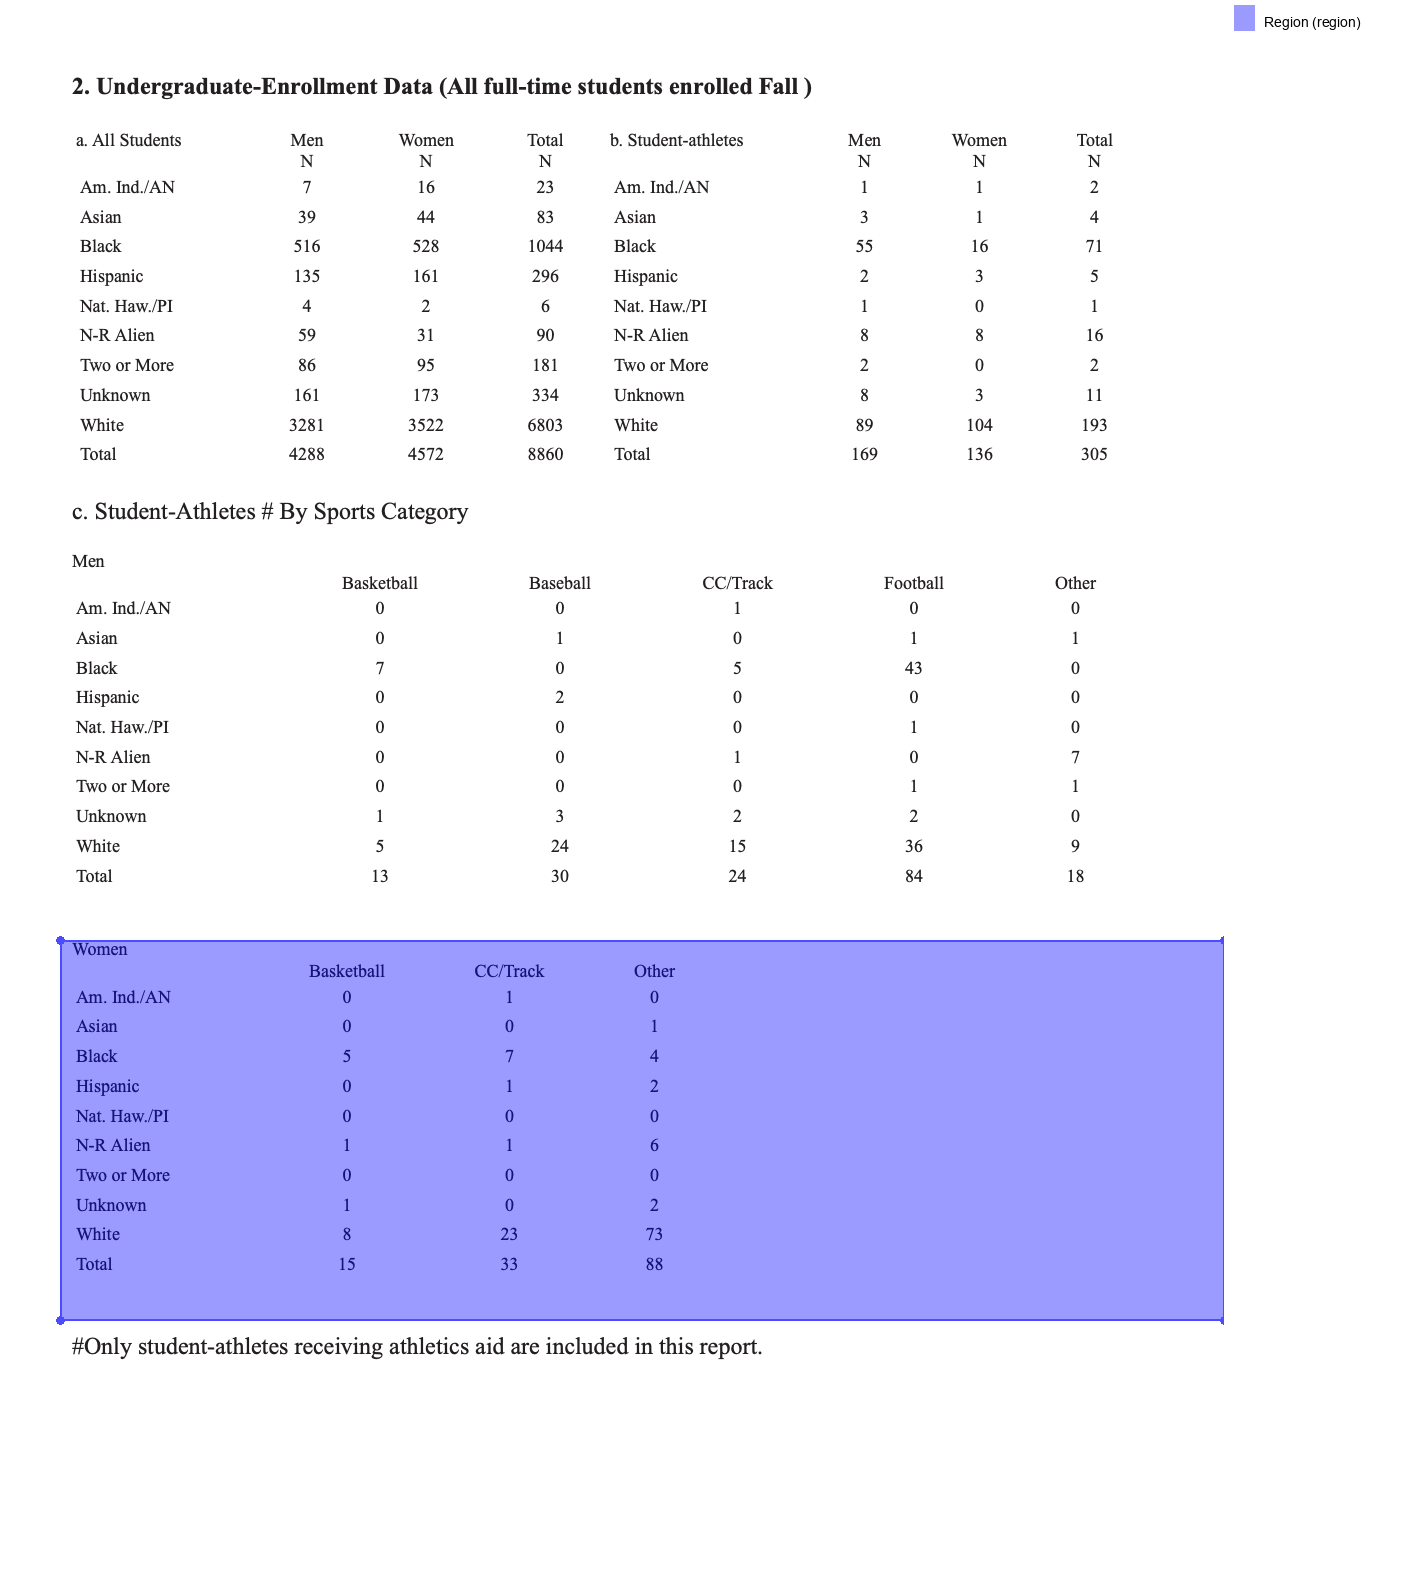

In [35]:
page.region(top=470, height=190).clip(left=30, right=850).show()

In [36]:
women_sport_table = (
    page
    .region(top=470, height=190)
    .clip(left=30, right=850)
    .extract_table(table_settings={"snap_y_tolerance": 5})
)


In [37]:
clean_rows = [row for row in women_sport_table if any(cell.strip() for cell in row)]

if len(clean_rows) > 1:
    df_women = pd.DataFrame(clean_rows[1:], columns=clean_rows[0])
    df_women["School"] = "Abilene Christian University" 
    display(df_women)
else:
    print("No table found or table too short.")

,,Basketball,CC/Track,Other,School
0,Am. Ind./AN,0,1,0,Abilene Christian University
1,Asian,0,0,1,Abilene Christian University
2,Black,5,7,4,Abilene Christian University
3,Hispanic,0,1,2,Abilene Christian University
4,Nat. Haw./PI,0,0,0,Abilene Christian University
5,N-R Alien,1,1,6,Abilene Christian University
6,Two or More,0,0,0,Abilene Christian University
7,Unknown,1,0,2,Abilene Christian University
8,White,8,23,73,Abilene Christian University
9,Total,15,33,88,Abilene Christian University


In [3]:
pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])
all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"Skipping {filename}: No pages")
            continue

        page = pdf.pages[2]

        table = (
            page
            .region(top=470, height=190)
            .clip(left=30, right=850)
            .extract_table(table_settings={"snap_y_tolerance": 5})
        )

        if not table or len(table) < 2:
            print(f"No valid table in {filename}")
            continue

        clean_rows = [row for row in table if any(cell.strip() for cell in row)]
        if len(clean_rows) <= 1:
            print(f"Skipping {filename}: table too short after cleaning")
            continue

        df = pd.DataFrame(clean_rows[1:], columns=clean_rows[0])
        df["School"] = school
        all_data.append(df)
        print(f"Extracted from {filename}")

    except Exception as e:
        print(f"Error in {filename}: {e}")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv("women_sport_counts.csv", index=False)
    print("Saved as women_sport_counts.csv")
else:
    print("No data extracted.")

NameError: name 'os' is not defined